In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta

In [2]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
user_engagement

,time_stamp,user_id,visited
0,4/22/2014 3:53,1,1
1,11/15/2013 3:45,2,1
2,11/29/2013 3:45,2,1
3,12/9/2013 3:45,2,1
4,12/25/2013 3:45,2,1
...,...,...,...
207912,9/6/2013 6:14,11996,1
207913,1/15/2013 18:28,11997,1
207914,4/27/2014 12:45,11998,1
207915,6/2/2012 11:55,11999,1


In [4]:
user_engagement.visited.nunique()

1

In [5]:
def determining_adopted_user(engagement_df):
    #Create groups of user_ids
    engage_df_grouped = engagement_df.groupby(by='user_id')

    #Categories List
    is_adopted_user = []

    
    for group in engage_df_grouped:
        is_adopted_user.append(adopted_user_helper(group[1]['time_stamp']))
    
    return is_adopted_user
    

def adopted_user_helper(dates):
    #Convert the list of dates to datetime objects and sort them
    dates = sorted([dt.strptime(date, "%m/%d/%Y %H:%M") for date in dates])
    
    for i in range(len(dates)):
        current_date = dates[i]
        seven_day_window = current_date + timedelta(days=7)
        
        unique_days = set(date.date() for date in dates[i:] if date < seven_day_window)
        
        #Check if there are at least 3 unique days
        if len(unique_days) >= 3:
            return True
            
    return False

In [6]:
#True/False classes list
adopted_user_list = determining_adopted_user(user_engagement)

In [7]:
#Creating the user_id list to merge with the classes list
user_id_list = user_engagement['user_id'].unique()

In [8]:
#Merging the user_ids and classes lists into a DF
user_id_engagment = {'user_id' : user_id_list, 'adopted_user' : adopted_user_list}
adopted_user_df = pd.DataFrame(user_id_engagment)

In [9]:
adopted_user_df

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False
...,...,...
8818,11996,False
8819,11997,False
8820,11998,False
8821,11999,False


In [10]:
#Counts for each category
adopted_user_df['adopted_user'].value_counts()

adopted_user
False    7221
True     1602
Name: count, dtype: int64

In [11]:
#code for determining file encoding and reading it into a Pandas DF
import chardet

with open('takehome_users.csv', 'rb') as f:
    result = chardet.detect(f.read())

user_df = pd.read_csv('takehome_users.csv', encoding=result['encoding'])

In [12]:
user_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,9/6/2013 6:14,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,1/10/2013 18:28,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,4/27/2014 12:45,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,5/31/2012 11:55,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [13]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [14]:
#Dropping creation_time, name, email, last_session_creation_time columns
user_df = user_df[['object_id','creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']]

In [15]:
#Merge the Dataframes
df = pd.merge(user_df, adopted_user_df, how='left', left_on='object_id', right_on='user_id')

In [16]:
df

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,1,GUEST_INVITE,1,0,11,10803.0,1.0,False
1,2,ORG_INVITE,0,0,1,316.0,2.0,True
2,3,ORG_INVITE,0,0,94,1525.0,3.0,False
3,4,GUEST_INVITE,0,0,1,5151.0,4.0,False
4,5,GUEST_INVITE,0,0,193,5240.0,5.0,False
...,...,...,...,...,...,...,...,...
11995,11996,ORG_INVITE,0,0,89,8263.0,11996.0,False
11996,11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,11997.0,False
11997,11998,GUEST_INVITE,1,1,83,8074.0,11998.0,False
11998,11999,PERSONAL_PROJECTS,0,0,6,NaN,11999.0,False


In [17]:
#Drop the rows for user's there are no classes for
df.dropna(subset=['adopted_user'], inplace=True)

In [18]:
#Dropping more labels that will not be used in the model
df.drop(labels=['object_id', 'invited_by_user_id', 'user_id'], axis=1,inplace=True)

In [19]:
#Setting org_id to be a category column
df['org_id'] = df['org_id'].astype(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8823 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             8823 non-null   object
 1   opted_in_to_mailing_list    8823 non-null   int64 
 2   enabled_for_marketing_drip  8823 non-null   int64 
 3   org_id                      8823 non-null   object
 4   adopted_user                8823 non-null   object
dtypes: int64(2), object(3)
memory usage: 413.6+ KB


# Model

In [21]:
#Imports for Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [22]:
#Separate features and labels
X = df.drop(columns='adopted_user')
y = df['adopted_user'].astype(int)  # Convert True/False labels to 1/0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [24]:
#Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_num_scaled = scaler.transform(X_test[numerical_cols])

#One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_cat_encoded = encoder.transform(X_test[categorical_cols])

C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
X_train_preprocessed = np.concatenate((X_train_num_scaled, X_train_cat_encoded), 1)
X_test_preprocessed = np.concatenate((X_test_num_scaled, X_test_cat_encoded), 1)

In [34]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required in a leaf node
    'class_weight': ['balanced', 'balanced_subsample']
}

#Initialize RandomForestClassifier and train the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Optimize for ROC-AUC
    refit='roc_auc',    # Refit the best model based on ROC-AUC
    verbose=2,  # Show progress during search
    n_jobs=-1   # Use all available CPU cores
)

# Fit GridSearchCV on the preprocessed training data
grid_search.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='roc_auc', scoring='roc_auc', verbose=2)

In [35]:
# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.5381915933913815


In [36]:
# Retrieve the best model
best_rf_model = grid_search.best_estimator_

In [37]:
#Make predictions on the test data
y_pred = best_rf_model.predict(X_test_preprocessed)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6345609065155807


AUC-ROC: 0.5279002168657713


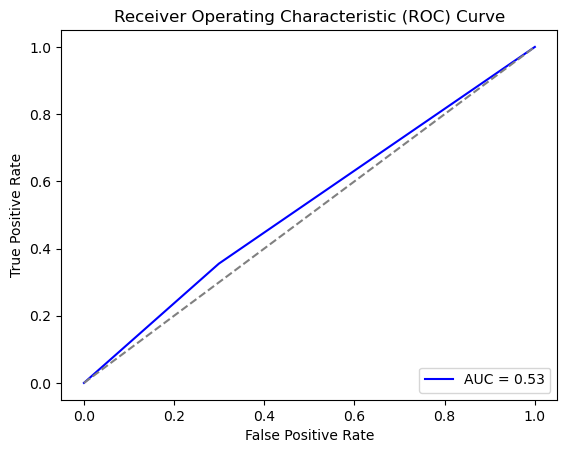

In [38]:
#Calculate AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)

#calculate the ROC Curve and plot it
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Get transformed feature names
numerical_features = numerical_cols.tolist()
categorical_features = encoder.get_feature_names_out(categorical_cols)
all_feature_names = numerical_features + categorical_features.tolist()

# Map back to original column names
original_feature_importances = {}
for feature, importance in zip(all_feature_names, feature_importances):
    # Aggregate by the base column name for one-hot encoded features
    original_feature = feature.split('_')[0] if '_' in feature else feature
    original_feature_importances[original_feature] = (
        original_feature_importances.get(original_feature, 0) + importance
    )

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame.from_dict(original_feature_importances, orient='index', columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(importance_df)

          Importance
org         0.734269
creation    0.164763
opted       0.056402
enabled     0.044566


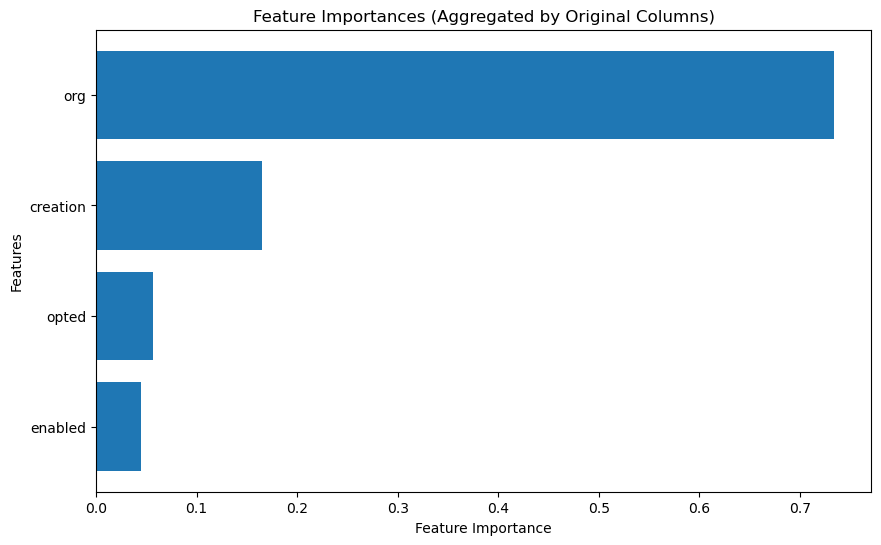

In [40]:
#Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()